<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [418]:
import pandas as pd

Load the dataset into a dataframe.


In [419]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Axes: ylabel='Density'>

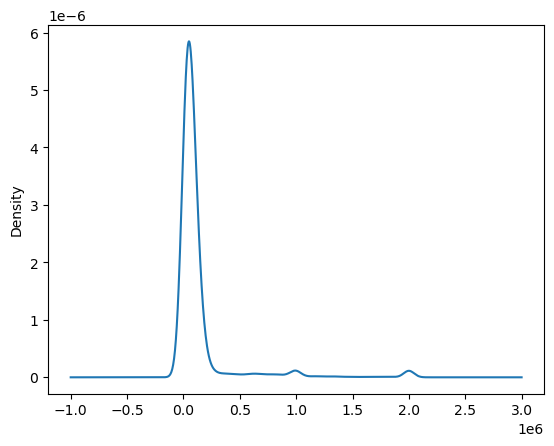

In [420]:
# your code goes here

df['ConvertedComp'].plot(kind = 'kde')


Plot the histogram for the column `ConvertedComp`.


<Axes: >

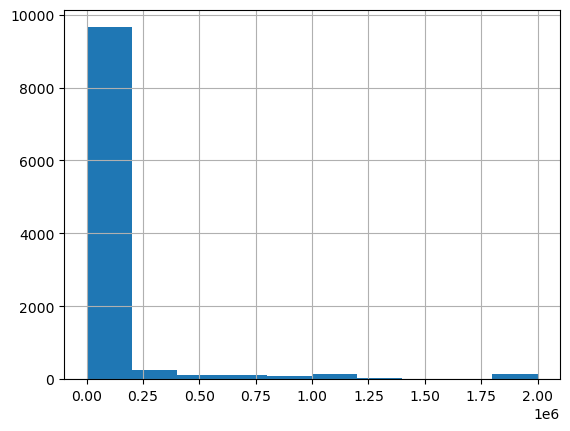

In [421]:
# your code goes here

df['ConvertedComp'].hist()


What is the median of the column `ConvertedComp`?


In [422]:
# your code goes here

df['ConvertedComp'].median()



57745.0

How many responders identified themselves only as a **Man**?


In [423]:
# your code goes here

df['Gender'].value_counts()


Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [424]:
# your code goes here

df[df['Gender'] == 'Woman']['ConvertedComp'].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [425]:
# your code goes here

df['Age'].describe()


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: >

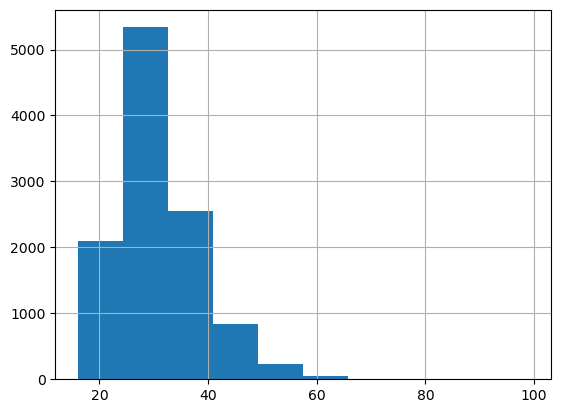

In [426]:
# your code goes here

df['Age'].hist()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: >

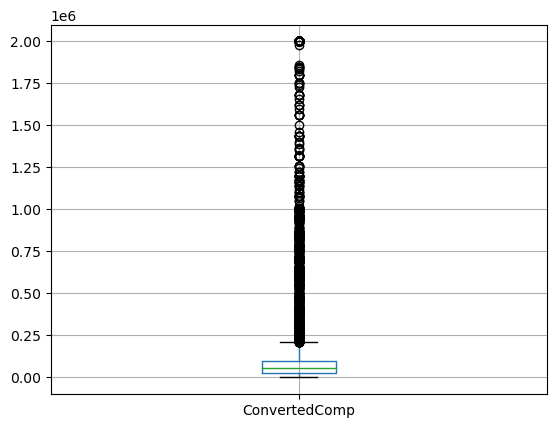

In [427]:
# your code goes here

df.boxplot('ConvertedComp')


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [428]:
import numpy as np

In [429]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [430]:
df['ConvertedComp'].median()

57745.0

In [431]:
# your code goes here

df['ConvertedComp'].describe()

def iqr(data, col):
    Q3 = np.nanquantile(data[col], 0.75)
    Q1 = np.nanquantile(data[col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
 
    print("IQR value for column %s is: %s" % (col, IQR))
    print("Lower Range value for column %s is: %s" % (col, lower_range))
    print("Upper Range value for column %s is: %s" % (col, upper_range))


In [432]:
iqr(df, 'ConvertedComp')

IQR value for column ConvertedComp is: 73132.0
Lower Range value for column ConvertedComp is: -82830.0
Upper Range value for column ConvertedComp is: 209698.0


Find out the upper and lower bounds.


In [433]:
# your code goes here

iqr(df, 'ConvertedComp')


IQR value for column ConvertedComp is: 73132.0
Lower Range value for column ConvertedComp is: -82830.0
Upper Range value for column ConvertedComp is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [434]:
# your code goes here

Q3 = np.nanquantile(df['ConvertedComp'], 0.75)
Q1 = np.nanquantile(df['ConvertedComp'], 0.25)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
print(((df['ConvertedComp'] < lower_range) | (df['ConvertedComp'] > upper_range)).sum())


879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [435]:
df['Outlier'] = 0

In [436]:
# your code goes here

mask = (df['ConvertedComp'] < lower_range) | (df['ConvertedComp'] > upper_range)


In [437]:
df['Outlier'] = mask

In [442]:
df = df[df['Outlier'] == False]

In [443]:
df['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [449]:
df.corr()['Age']

/var/folders/1k/0yr6jsm520v37sb2y9ws03lw0000gn/T/ipykernel_92656/114884634.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Age']


Respondent       0.003950
CompTotal        0.006371
ConvertedComp    0.401821
WorkWeekHrs      0.037452
CodeRevHrs      -0.017961
Age              1.000000
Outlier               NaN
Name: Age, dtype: float64

<Axes: >

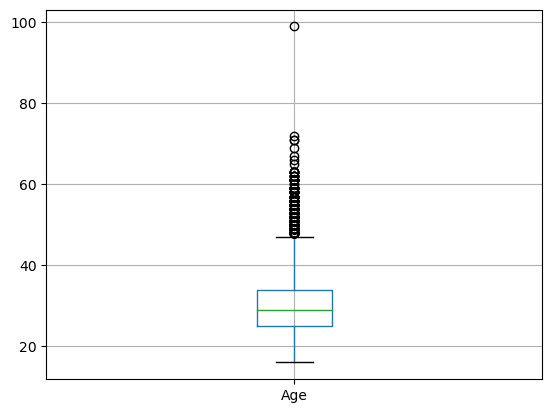

In [446]:
# your code goes here

df[['Age']].boxplot()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
